
## Exercise meanshift

        1. load 'data/iris_data.csv' into a dataframe (use decimal=',') and remove the 2 Petal columns. Now we are left with a 2D feature space
        
    2. get unique labels (Species column)
    
    3. plot with a scatter plot each iris flower sample colored by label (3 different colors) image.png
    
    4. use: MeanShift and estimate_bandwidth from sklearn.cluster to first estimate bandwidth and then get the clusters (HINT: estimate_bandwidth() takes an argument: quantile set it to 0.2 for best result)
    
    5. print out labels, cluster centers and number of clusters (as returned from the MeanShift function)
    
    6. create a new scatter plot where each flower is colored according to cluster label
    
    7. add a dot for the cluster centers
    
    8. Compare the 2 plots (colored by actual labels vs. colored by cluster label)
    
    9. Try changing the 'quantile' argument to 0.15 and see what happens to your cluster plot.



In [14]:
import pandas as pd

df = pd.read_csv("../data/iris_data.csv", decimal=",")

df

,Sepal length,Sepal width,Petal length,Petal width,Species
0,5.1,3.5,1.4,0.2,I. setosa
1,4.9,3.0,1.4,0.2,I. setosa
2,4.7,3.2,1.3,0.2,I. setosa
3,4.6,3.1,1.5,0.2,I. setosa
4,5.0,3.6,1.4,0.2,I. setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,I. virginica
146,6.3,2.5,5.0,1.9,I. virginica
147,6.5,3.0,5.2,2.0,I. virginica
148,6.2,3.4,5.4,2.3,I. virginica


In [15]:
del df["Petal length"]
del df["Petal width"]

df

,Sepal length,Sepal width,Species
0,5.1,3.5,I. setosa
1,4.9,3.0,I. setosa
2,4.7,3.2,I. setosa
3,4.6,3.1,I. setosa
4,5.0,3.6,I. setosa
...,...,...,...
145,6.7,3.0,I. virginica
146,6.3,2.5,I. virginica
147,6.5,3.0,I. virginica
148,6.2,3.4,I. virginica


In [16]:
unique_species = df["Species"].unique()

unique_species

array(['I. setosa', 'I. versicolor', 'I. virginica'], dtype=object)

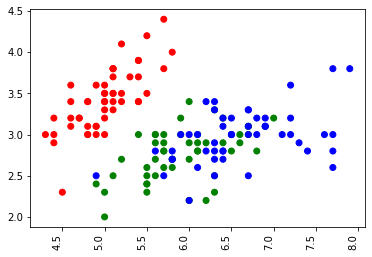

In [17]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

colors = {'I. setosa':'red', 'I. versicolor':'green', 'I. virginica':'blue'}

ax.scatter(df['Sepal length'], df['Sepal width'], c=df['Species'].map(colors))

plt.xticks(rotation=90, horizontalalignment='right',fontweight='light')
plt.show()

In [19]:
from sklearn.cluster import MeanShift, estimate_bandwidth
import numpy as np

#df.drop("Species", axis=1, inplace=True)

def mean_shift(data, n_samples=1000):
    bandwidth = estimate_bandwidth(data, quantile=0.2, 
                                   n_samples=n_samples)

    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    ms.fit(data)
    labels = ms.labels_
    cluster_centers = ms.cluster_centers_

    labels_unique = np.unique(labels)
    n_clusters = len(labels_unique)

    print('Number of estimated clusters : {}'.format(n_clusters))
    
    return labels, cluster_centers, n_clusters

labels, cluster_centers, n_clusters = mean_shift(df)

Number of estimated clusters : 3


In [20]:
print(labels)
print(cluster_centers)
print(n_clusters)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 2 0 0 2 1 2 0 2 0
 0 0 0 0 0 0 2 2 0 0 0 2 0 0 2 0 0 0 2 2 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
[[6.08727273 2.90181818]
 [5.         3.37692308]
 [7.6        3.73333333]]
3


3


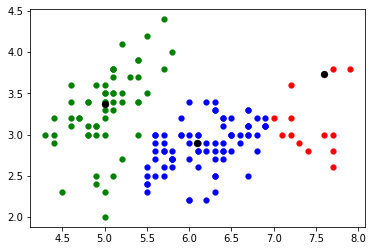

In [23]:
import matplotlib.pyplot as plt
from itertools import cycle

fig = plt.figure()
ax = fig.add_subplot(111)

colors = cycle('bgrcmy')

arr = df.to_numpy()

print(n_clusters)



for k, col in zip(range(n_clusters), colors):
    my_members = (labels == k)
    cluster_center = cluster_centers[k]


    x, y = arr[my_members,0], arr[my_members,1]

    ax.scatter(x, y, c=col, linewidth=0.2)
    ax.scatter(cluster_center[0], cluster_center[1], c='k', s=50, linewidth=0.2)